<a href="https://colab.research.google.com/github/CseMony/MY_thesis/blob/main/Propsed_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage import io
import pandas as pd
import os
from skimage.color import rgb2gray
from skimage import data, color, exposure
from PIL import Image

dataset_path = '/gdrive/My Drive/gt_db'

dataset_dir  = os.listdir(dataset_path)
count=0 
training_data=[]
face_image=[] 
img_size=224

train_path='/gdrive/My Drive/cropped_faces'
#class_num=13233
def create_training_data():
  
                    
  for i in os.listdir(dataset_path):
      path=['/gdrive/My Drive/gt_db/'+i]
      #print(path)
      for j in path: 
        #print(i)
          directory  = os.listdir(j)
          for k in directory:
            filename=j+'/'+k
            if k.endswith(".jpg"):
              img = io.imread(filename)
              
              cls = filename.split("/")[4]
              class_num=cls[1]+cls[2]
              class_num=int(class_num)
              class_num=class_num-1
              #print(class_num)
              
              new_array=cv2.resize(img,(img_size,img_size),3)
              training_data.append([new_array,class_num])
            
create_training_data()     


In [ ]:

X=[]
y=[]

for feature,label in training_data:
  X.append(feature)  
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3) 
y = np.array(y).reshape(-1, 1) 


In [ ]:
X=X/255.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,stratify=y,random_state=42)

In [ ]:
from tensorflow.keras import backend
from tensorflow import keras
from keras import regularizers
from tensorflow.keras import initializers
from keras.regularizers import l2,l1
#Instantiate an empty model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model=tf.keras.models.Sequential()

# C1 Convolutional Layer
#64 add
model.add(keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu',input_shape=(img_size,img_size,3),kernel_initializer='glorot_uniform', padding='same'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', kernel_initializer='glorot_uniform',padding='same'))
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu',kernel_initializer='glorot_uniform', padding='same'))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu',kernel_initializer='glorot_uniform', padding='same'))
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', kernel_initializer='glorot_uniform',padding='same'))
model.add(keras.layers.Conv2D(64, kernel_size=(1, 1), strides=(1, 1), activation='relu',kernel_initializer='glorot_uniform', padding='same'))
#model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))        

In [ ]:

model.add(keras.layers.Flatten())

In [ ]:

model.add(keras.layers.Dense(1150, activation='relu',kernel_initializer='glorot_uniform'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(400, activation='relu',kernel_initializer='glorot_uniform'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(50, activation='softmax'))

# Compile the model


#model.compile(loss=tf.losses.sigmoid_cross_entropy, optimizer='sgd', metrics=['accuracy'])
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=0.0001,decay=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 128)       7

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("proposed_model.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1, mode='auto')
hist = model.fit(X_train,y_train,steps_per_epoch=30,validation_data= (X_test,y_test),validation_steps=2,epochs=15,callbacks=[checkpoint,early])

Epoch 1/15
30/30 [==============================] - 195s 6s/step - loss: 3.9060 - accuracy: 0.0287 - val_loss: 3.6958 - val_accuracy: 0.3267
Epoch 2/15
30/30 [==============================] - 195s 7s/step - loss: 3.4460 - accuracy: 0.1685 - val_loss: 1.8679 - val_accuracy: 0.6333
Epoch 3/15
30/30 [==============================] - 205s 7s/step - loss: 2.0106 - accuracy: 0.4528 - val_loss: 0.9426 - val_accuracy: 0.7133
Epoch 4/15
30/30 [==============================] - 196s 7s/step - loss: 1.1414 - accuracy: 0.6664 - val_loss: 0.4167 - val_accuracy: 0.9000
Epoch 5/15
30/30 [==============================] - 192s 6s/step - loss: 0.5184 - accuracy: 0.8495 - val_loss: 0.3071 - val_accuracy: 0.9333
Epoch 6/15
30/30 [==============================] - 193s 6s/step - loss: 0.3564 - accuracy: 0.9023 - val_loss: 0.1539 - val_accuracy: 0.9733
Epoch 7/15
30/30 [==============================] - 192s 6s/step - loss: 0.2183 - accuracy: 0.9376 - val_loss: 0.1251 - val_accuracy: 0.9867
Epoch 8/15
30

In [ ]:
layer_names = [] 
  
for layer in model.layers[:]: 
  layer_names.append(layer.name) 
print(layer_names) 

['conv2d', 'conv2d_1', 'max_pooling2d', 'conv2d_2', 'conv2d_3', 'max_pooling2d_1', 'conv2d_4', 'conv2d_5', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dropout_1', 'dense_2']


In [ ]:
filters, biases = model.layers[1].get_weights()

In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

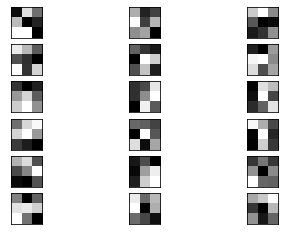

In [ ]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [ ]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[:15]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,img_size,img_size,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

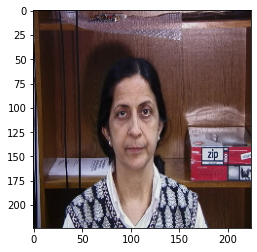

In [ ]:
plt.imshow(X_train[10])

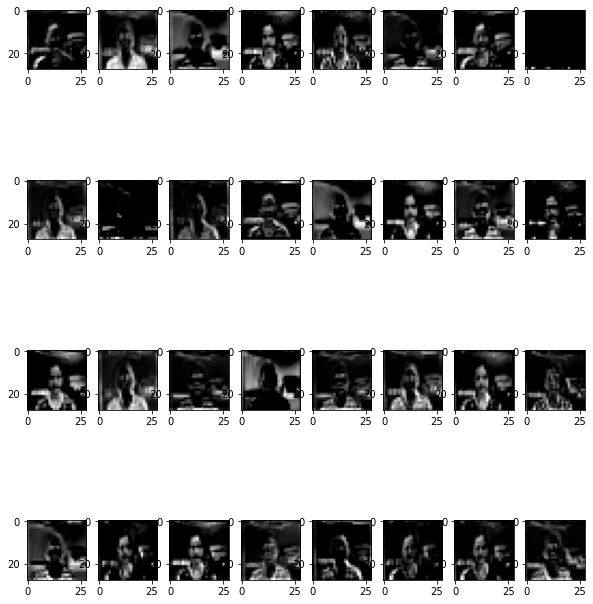

In [ ]:
display_activation(activations, 8, 4, 8)

In [ ]:
activations[2].shape

(1, 112, 112, 32)

In [ ]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 10s 2s/step - loss: 0.1020 - accuracy: 0.9800


[0.10196935385465622, 0.9800000190734863]

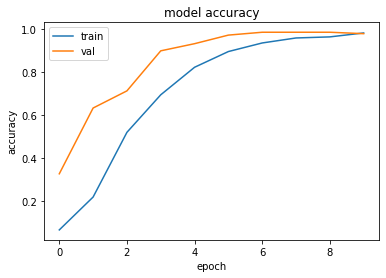

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

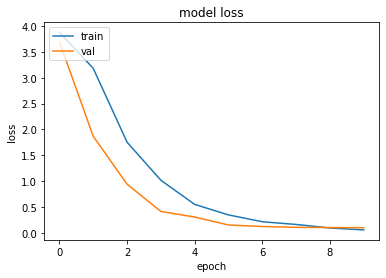

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('epic_face_reader_proposed.model')

INFO:tensorflow:Assets written to: epic_face_reader_proposed.model/assets


In [ ]:
new_model = tf.keras.models.load_model('epic_face_reader_proposed.model')
predictions = new_model.predict([X_test])
print(predictions)

import numpy as np

print(np.argmax(predictions[1]))

[[3.2077976e-10 1.5865711e-09 3.9660231e-10 ... 5.0211287e-07
  2.6579343e-07 9.9999750e-01]
 [4.5589921e-05 1.4459984e-04 3.8085755e-06 ... 1.9904730e-06
  8.6289137e-06 7.4615023e-06]
 [5.8152989e-09 5.5271717e-06 3.0019919e-08 ... 1.8758897e-10
  8.0476481e-10 3.2787874e-08]
 ...
 [2.8215913e-04 2.1937222e-03 3.4670356e-05 ... 3.2545970e-04
  4.1649901e-06 3.4508226e-05]
 [2.1174260e-09 1.6858394e-07 6.9894495e-09 ... 2.0939643e-08
  1.2963852e-07 4.2886590e-08]
 [2.5002301e-08 3.6513200e-08 3.7521843e-06 ... 9.0221201e-06
  1.5711045e-07 2.2529136e-08]]
32


In [ ]:
predicted_classes = np.argmax(np.round(predictions),axis=1)

In [ ]:
predicted_classes

array([49, 32, 12, 23, 47,  8, 27, 21, 32,  7, 46,  4, 46,  2, 41,  9, 41,
       39, 27, 36, 12,  4, 45,  0,  5, 34, 23, 43, 30, 47, 49,  5, 45,  3,
       31, 40, 39, 48, 17, 25,  6, 27, 11, 42, 21, 33, 28, 48, 24,  1, 18,
       16, 14, 33, 44, 37, 41,  8,  3,  7, 31, 38, 13, 19, 35, 20, 20, 13,
       35,  4, 26, 16,  1, 15, 30, 16, 28, 20, 48, 44, 26, 17, 42, 32, 15,
       21, 24, 10,  2, 45,  1, 38, 11,  9,  5, 39, 11, 14, 29, 22,  0,  0,
       43, 26, 17, 19, 40, 14, 47, 15, 12, 42,  0, 10, 33, 22,  9, 37, 12,
       34,  6,  2, 43, 29,  0, 40, 22, 44,  8, 31, 35, 37, 19,  7, 36, 38,
       23,  6, 24,  3, 29, 25, 28, 10, 36, 49, 18, 25, 34, 46])

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))


Found 450 correct labels


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
target_names = ["Class {}".format(i) for i in range(50)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.60      1.00      0.75         3
     Class 1       1.00      1.00      1.00         3
     Class 2       1.00      1.00      1.00         3
     Class 3       1.00      1.00      1.00         3
     Class 4       1.00      1.00      1.00         3
     Class 5       1.00      1.00      1.00         3
     Class 6       1.00      1.00      1.00         3
     Class 7       1.00      1.00      1.00         3
     Class 8       1.00      1.00      1.00         3
     Class 9       1.00      1.00      1.00         3
    Class 10       1.00      1.00      1.00         3
    Class 11       1.00      1.00      1.00         3
    Class 12       0.75      1.00      0.86         3
    Class 13       1.00      0.67      0.80         3
    Class 14       1.00      1.00      1.00         3
    Class 15       1.00      1.00      1.00         3
    Class 16       1.00      1.00      1.00         3
    Class 17       1.00    

In [ ]:
cm=confusion_matrix(y_test,predicted_classes)
def plot_confusion_matrix(cm,classes,normalize=False,cmap=plt.cm.Blues,title='confusion matrix'):
  plt.gcf().set_size_inches(15,15)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm=cm.astype('float'/cm.sum(axis=1)[:,np.newaxis])
    print("normalized confusion matrix")
  else:
    print('confusion matrix without normalization')

  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(i,j,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel("true label")
  plt.xlabel("Predicted label")

confusion matrix without normalization
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


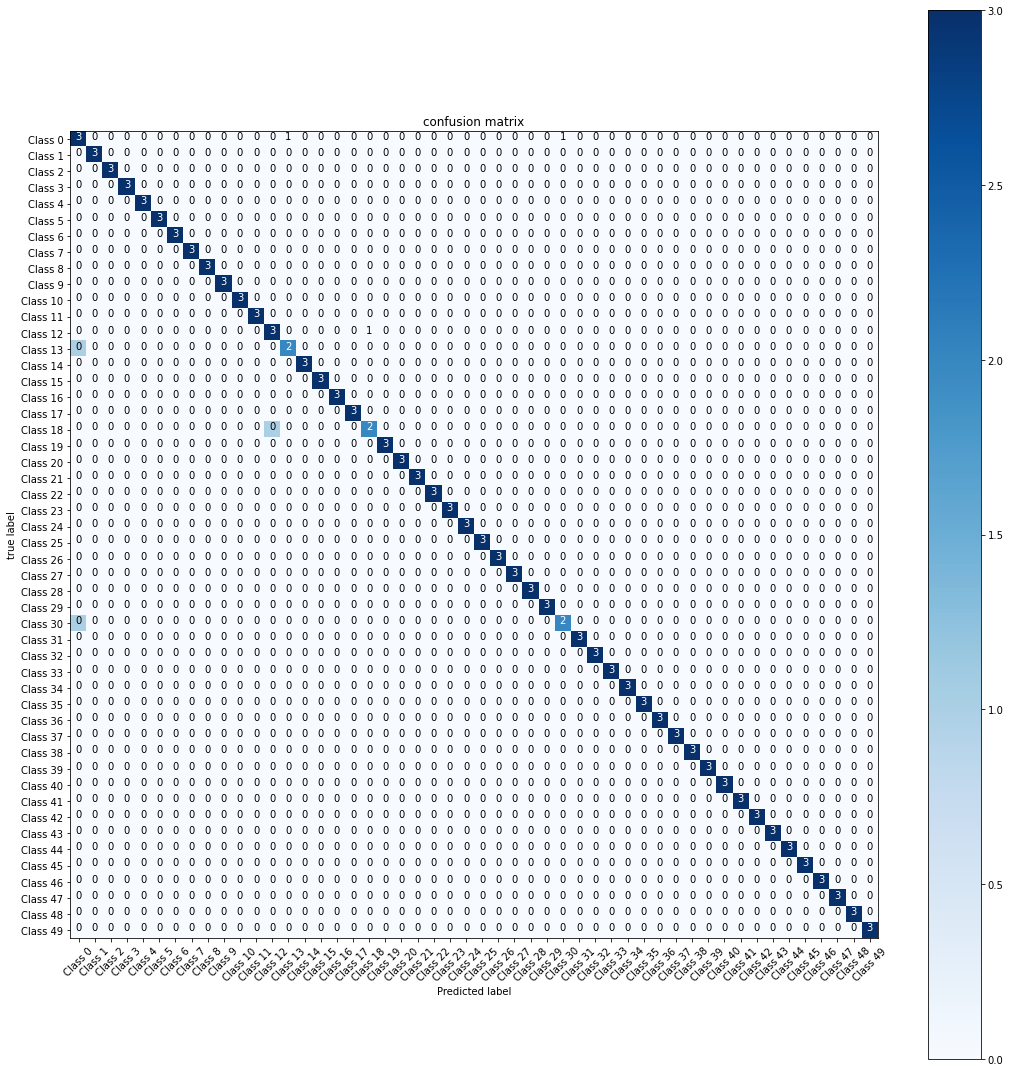

In [ ]:
import itertools
plot_confusion_matrix(cm,target_names,title='confusion matrix')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


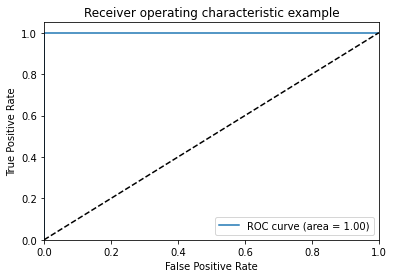

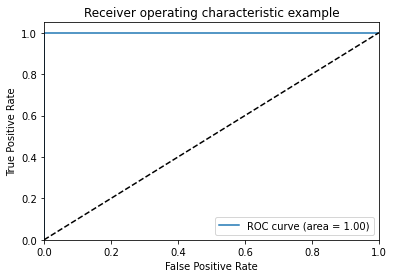

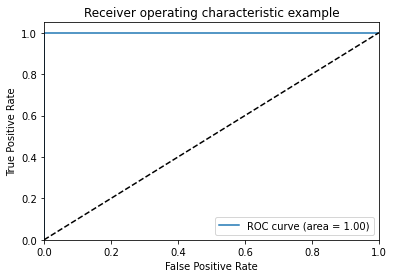

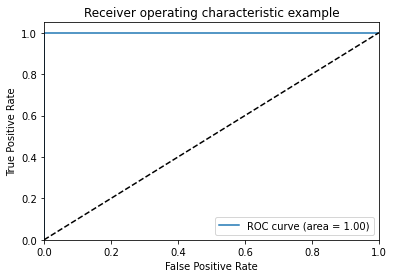

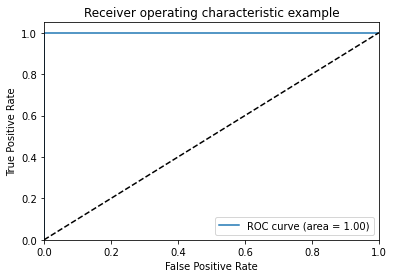

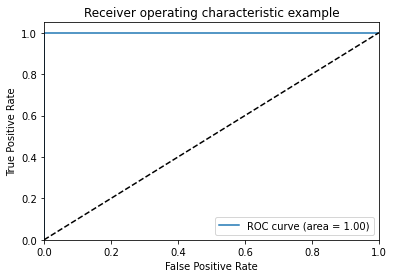

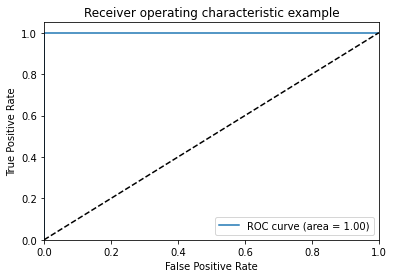

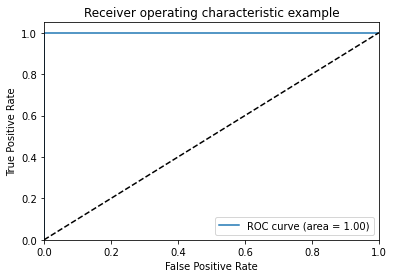

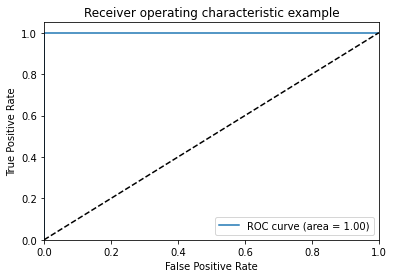

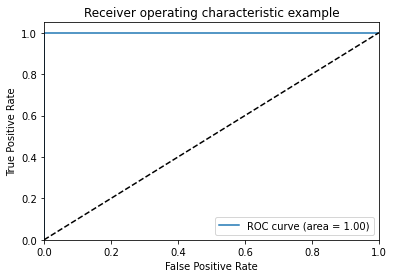

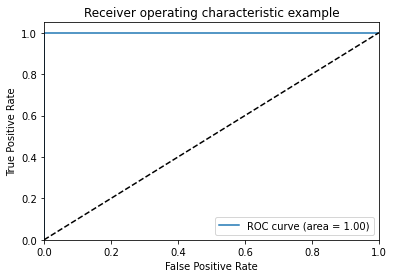

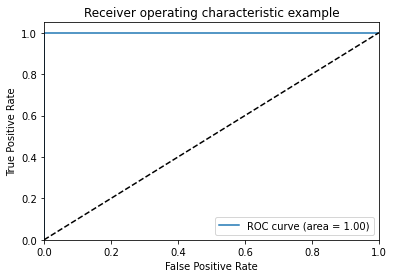

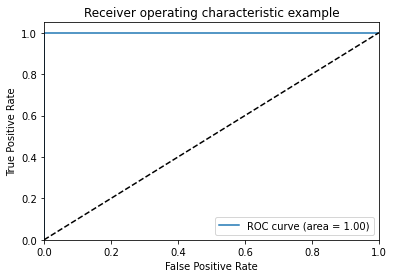

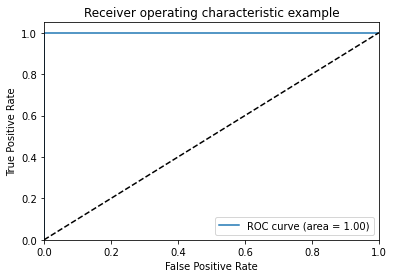

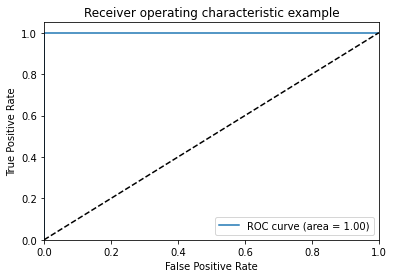

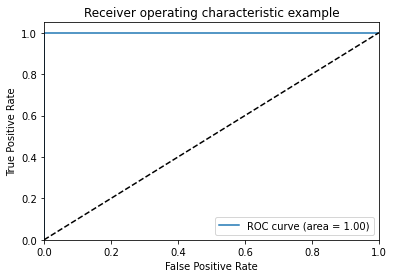

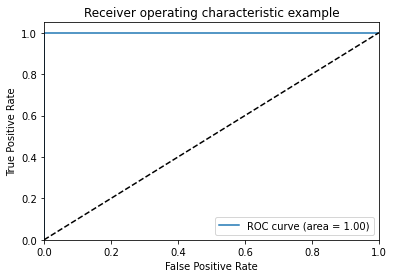

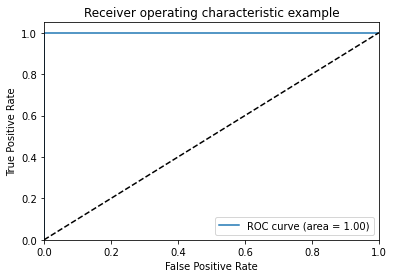

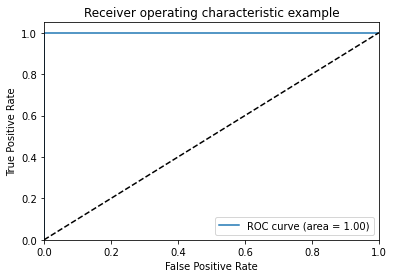

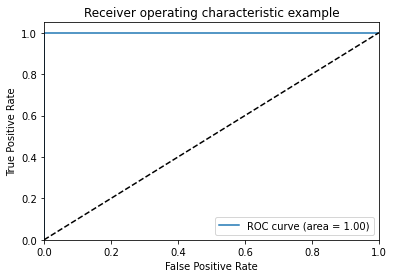

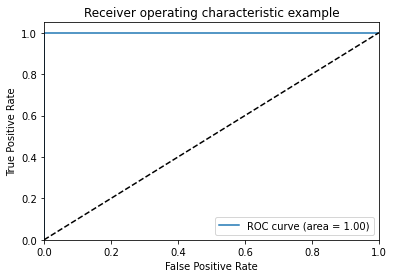

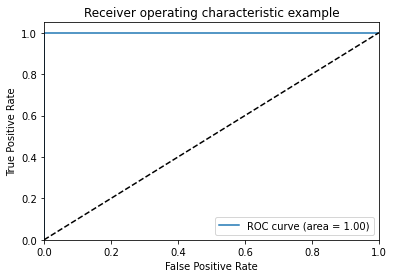

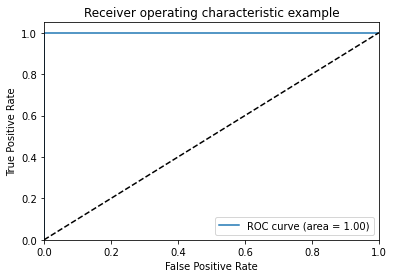

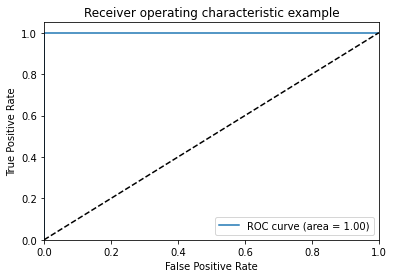

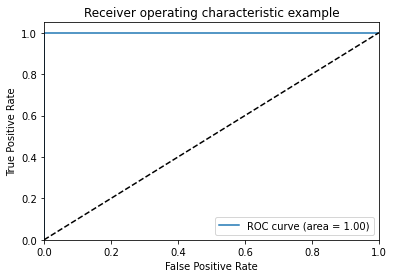

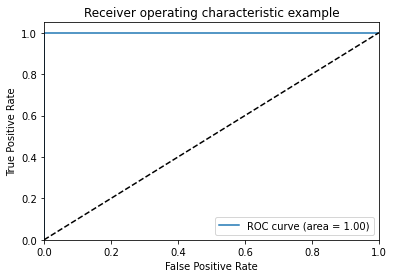

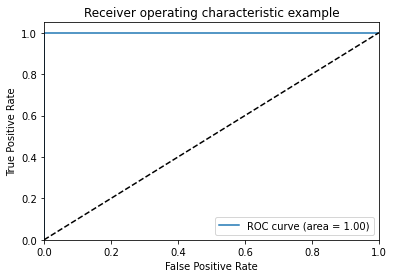

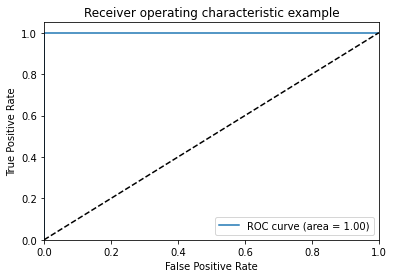

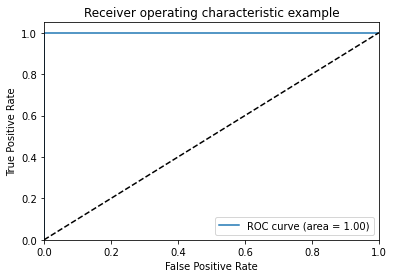

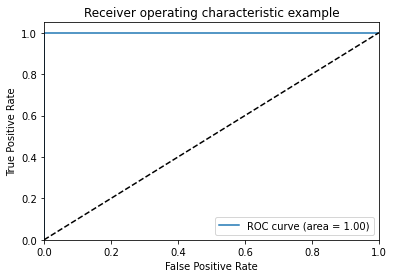

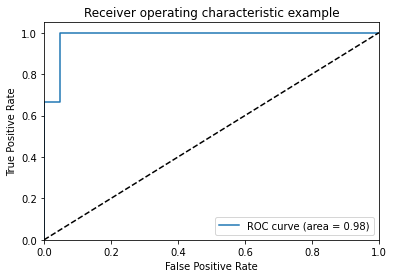

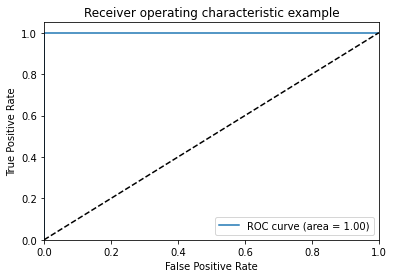

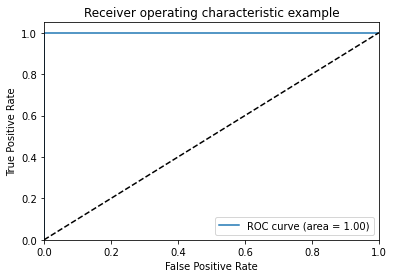

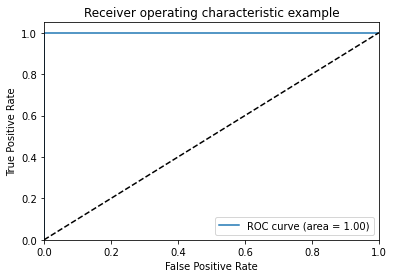

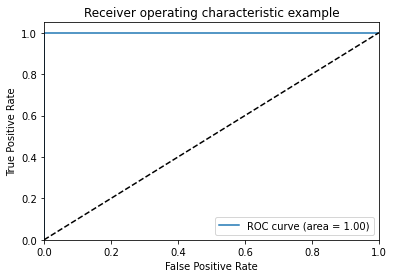

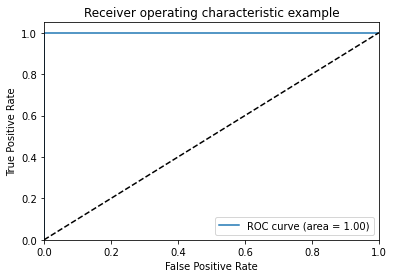

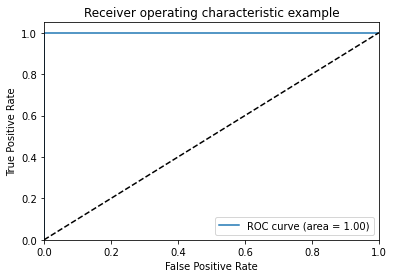

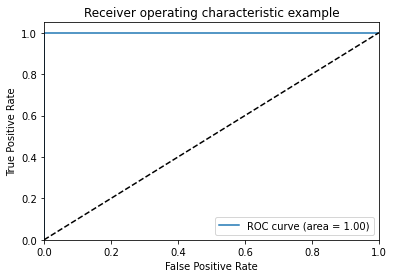

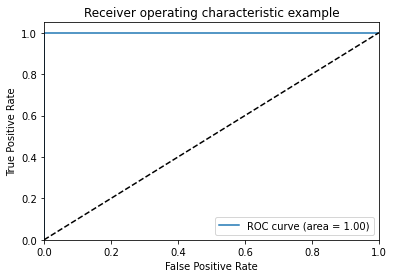

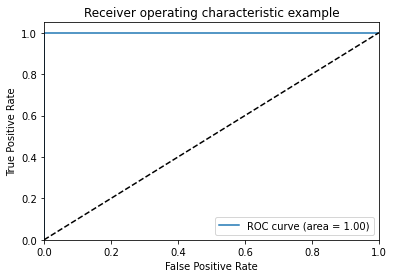

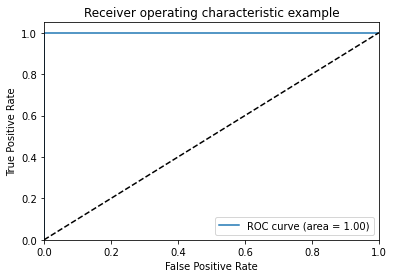

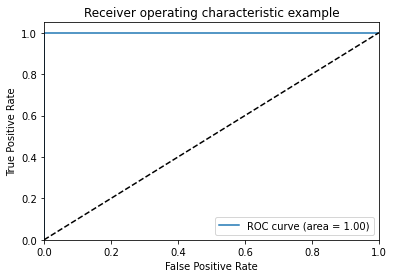

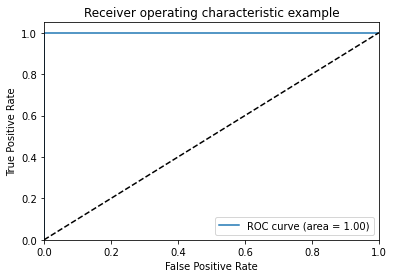

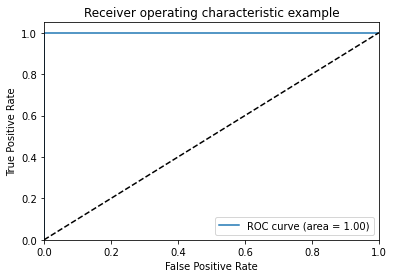

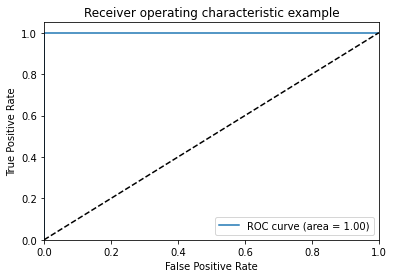

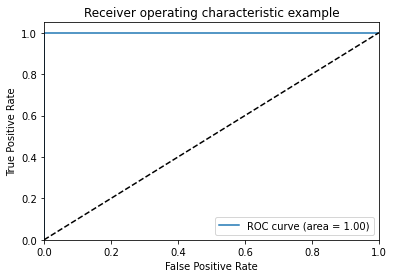

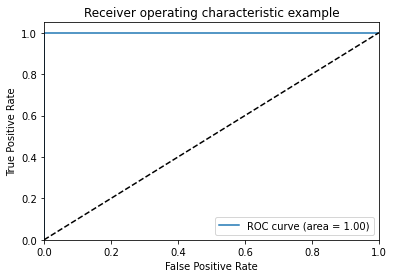

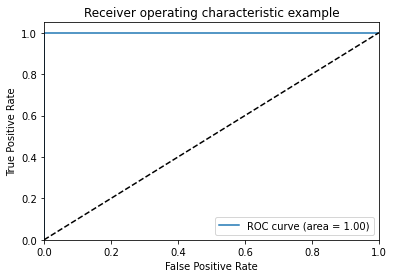

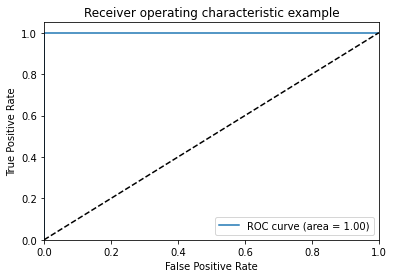

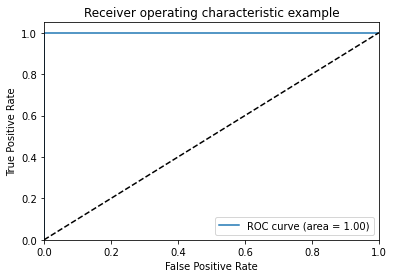

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = new_model.predict_proba(X_test)
n_classes=50
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if __name__ == '__main__':


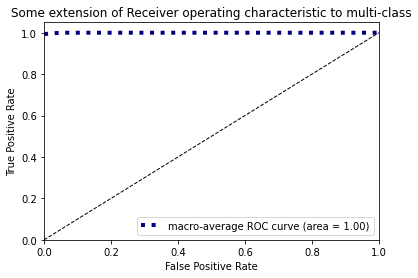

In [ ]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])



plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)



plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()